In [15]:
!sudo apt-get install openjdk-7-jdk 
!sudo apt-get install python-dev
!sudo pip3 install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [16]:
!sudo pip3 install wordcloud

In [17]:
!apt-get update- qq
!apt-get install fonts-nanum* -qq

E: Invalid operation update-


In [18]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '안녕')

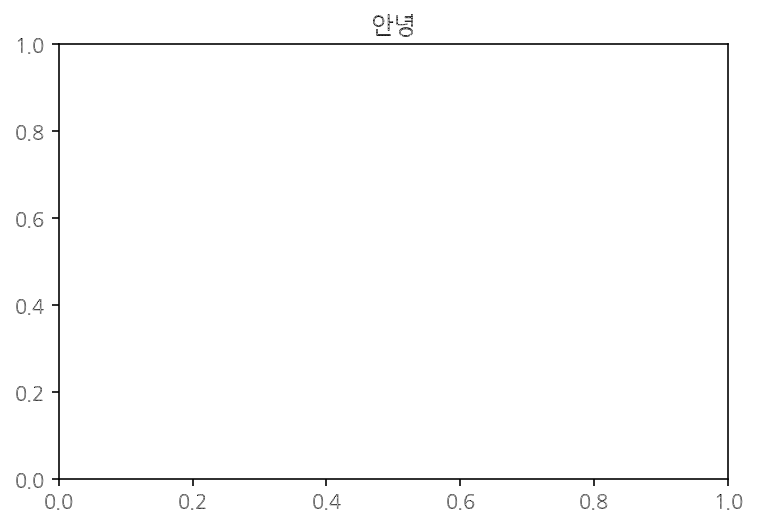

In [19]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.title('안녕')

In [20]:
import re
import os
import nltk
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

In [21]:
komoran = Komoran()
hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

In [38]:
import os
from konlpy.tag import Okt
from collections import Counter

# Okt 형태소 분석 객체 생성
ok_twitter = Okt()

# 저장된 파일의 위치 탐색 후, file변수에 저장
file = open('/content/drive/MyDrive/dataset/text/KakaoTalk_friends.txt','r',encoding='utf-8')
total_lines = file.readlines() # txt파일을 줄 단위로 읽음
file.close()
print(total_lines)

# 크롤링 댓글파일 가져와서 reply_text 리스트에 저장
reply_text = []
for line in total_lines:
  reply_text.append(line[:-1])

# 형태소 분류하고 확인 하기
sentences_tag = []
for sentence in reply_text:
  morph = ok_twitter.pos(sentence)
  sentences_tag.append(morph)

# 명사만 출력해 보기
'''
for my_sentence in sentences_tag:
	for word, tag in my_sentence:
		if tag in ['Noun']:
			print(word)
'''

# 필요한 품사만 추출해보기(명사를 bucket list에 담기)
stopwords = ['오후','오전','사진','조용화','정준수','유병훈','이모티콘','준수']
bucket_list = []
for my_sentence in sentences_tag:
    for word, tag in my_sentence:
        if tag in ['Noun'] and len(word)>1 and (word not in stopwords):
            bucket_list.append(word)
        
# 단어 빈도수 구하기
# 각 원소의 출현 횟수를 계산하는 Counter 모듈을 활용한다.
from collections import Counter
counts = Counter(bucket_list)



# 명사 빈도 순서대로 상위 30개 출력
print(counts.most_common(30))

# 명사와 형용사를 모두 추출하고 상위 50개를 출력
bucket_list_2 = []
for my_sentence in sentences_tag:
  for word, tag in my_sentence:
    if tag in ['Noun','Adjective']:
      bucket_list_2.append(word)
counts = Counter(bucket_list)
print(counts.most_common(50))

['조용화, 정준수 님과 카카오톡 대화\n', '저장한 날짜 : 2021-11-23 22:14:07\n', '\n', '--------------- 2020년 4월 10일 금요일 ---------------\n', '[정준수] [오전 6:18] 잘들사시나\n', '[조용화] [오전 6:54] 준수야 꿀빨고있냐\n', '[정준수] [오전 7:19] 개꿀이지 ㅋㅋ\n', '[정준수] [오전 7:19] 그제 시작했는데\n', '[정준수] [오전 7:19] 그제 5명 어제4명봄 환자\n', '[조용화] [오전 7:37] ㅋㅋ\n', '[조용화] [오전 7:37] 지리네\n', '[조용화] [오전 7:37] 9시출근 4시퇴근이냐\n', '[정준수] [오전 7:37] 진료실에서 노트북으로 영화봤음\n', '[정준수] [오전 7:37] 아니ㅠ9 to 6이지 ㅋㅋ\n', '[조용화] [오전 7:37] 근데 4시에 퇴근하던데ㅋ\n', '[정준수] [오전 7:37] 그거 감사 나오면 ㅈ됨 ㅋㅋ\n', '[조용화] [오전 7:37] 아직 눈치보는중이냐\n', '[정준수] [오전 7:37] 공무원들이랑 어지간히 친하거나\n', '[정준수] [오전 7:38] 아 걔네가 보건지소 있음 괜찮아\n', '[정준수] [오전 7:38] 근데 난 보건소라서 ㅋㅋ\n', '[조용화] [오전 7:38] 광주 어디로배정됨?\n', '[정준수] [오전 7:38] 함평군보건소야 ㅋㅋ\n', '[정준수] [오전 7:39] 집에서 차로 30분쯤걸림\n', '[조용화] [오전 7:40] 와우\n', '[조용화] [오전 7:40] 좋은데걸렸네\n', '[조용화] [오전 7:40] 나비축제 가야겠네\n', '[정준수] [오전 7:40] ㅇㅇ 운이좋았다 ㅋㅋ\n', '[정준수] [오전 7:40] 나비축제 올해 코로나땜에 못하고\n', '[정준수] [오전 7:41] 가을에 국향대전에서 핑크뮬리 보러오면 되겠다\n', '[정준수] [오전 7:41] 여자친구 만들면\n', '[조용화] [오전 7:41] 좋지ㅋㅋ\n',

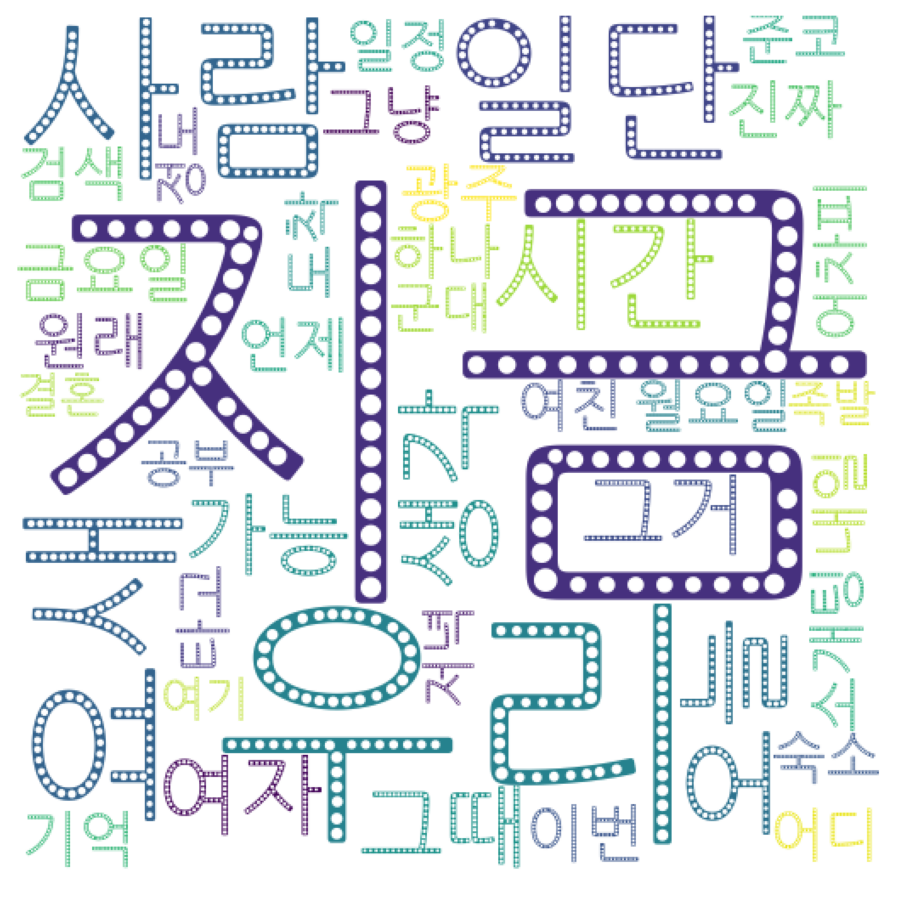

In [39]:
from wordcloud import WordCloud
wc = WordCloud(font_path = path,
                    background_color = 'white',
                    width=512, height=512,
                    max_font_size=500,
                    max_words=40)
wc.generate_from_frequencies(counts)

plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Save to png
wc.to_file('/content/drive/MyDrive/dataset/text/friends_analysis.jpg')
